<a href="https://colab.research.google.com/github/AntoniCrous/Aprndizaje_No_Supervisado-Trabajo/blob/master/Agrupamiento_Espectral_Ag3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupamiento Espectral

Este algoritmo se basa en mediante una transformación de los datos separar los grupos homogeneneos. Y asi maximizar la dispersión iterclúster y minimizar la dispersión intraclúster.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.cluster import SpectralClustering

##Dataset 1 Conocido

El dataset 1 el qual conocemos las classes tiene 1999 instancias.


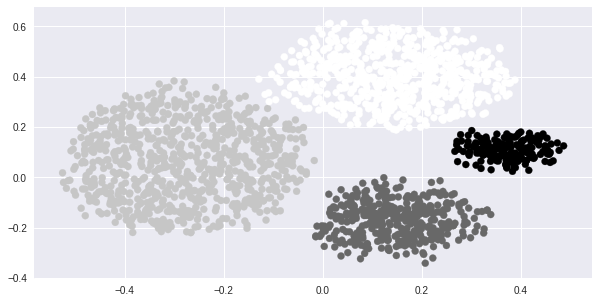

In [10]:
#Cargamos y Mostramos el dataset 1
data_file_url = 'https://raw.githubusercontent.com/jhernandezgonzalez/unsupervisedlearning/master/datasets/sinteticos/dataset_cuatro_diferente_medida.csv'
D1 = np.array(pd.read_csv(data_file_url,header=0))
D1 = D1[ np.random.choice(np.arange(D1.shape[0]), D1.shape[0], replace=False) ,:]
D1x = D1[:,0:2]
D1y = D1[:,2]
print('El dataset 1 el qual conocemos las classes tiene',D1y.size,'instancias.')

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D1x[:,0],D1x[:,1], c=D1y)

#### Conocido
Como conocemos el numero de classes assignamos k = 4

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


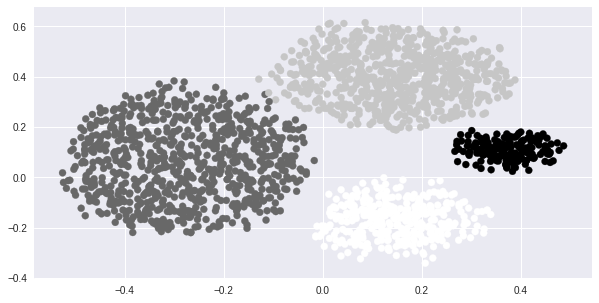

In [11]:

clustering = SpectralClustering(n_clusters=4, eigen_solver='arpack',affinity="nearest_neighbors").fit(D1x)
D1y = clustering.labels_
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D1x[:,0],D1x[:,1], c=D1y)

## Conclusiones
Puesto que conocemos el dataset podemos ver que se adapta muy bien salvo por unos puntos.

##Dataset 2  No Conocido

El dataset 2 el qual conocemos las classes tiene 2000 instancias.


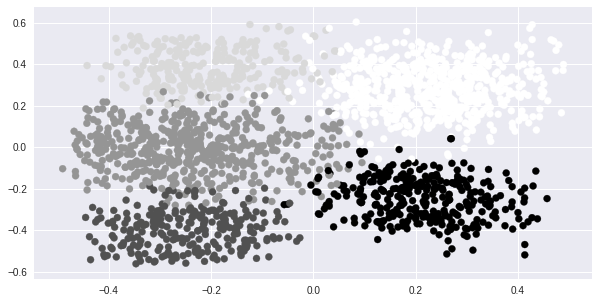

In [12]:
#Cargamos y Mostramos el dataset 2
data_file_url = 'https://raw.githubusercontent.com/jhernandezgonzalez/unsupervisedlearning/master/datasets/sinteticos/dataset_inseparable.csv'
D2 = np.array(pd.read_csv(data_file_url,header=0))
D2 = D2[ np.random.choice(np.arange(D2.shape[0]), D2.shape[0], replace=False) ,:]
D2x = D2[:,0:2]
D2y = D2[:,2]
print('El dataset 2 el qual conocemos las classes tiene',D2y.size,'instancias.')

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D2x[:,0],D2x[:,1], c=D2y)

#### Dataset No Conocido
Como no conocemos el numero de clusters debemos usar metricas para encontrar el numero de k que maximize la dispersión iterclúster y minimize la dispersión intraclúster.

Text(0, 0.5, 'Medida de Calinski_harabaz')

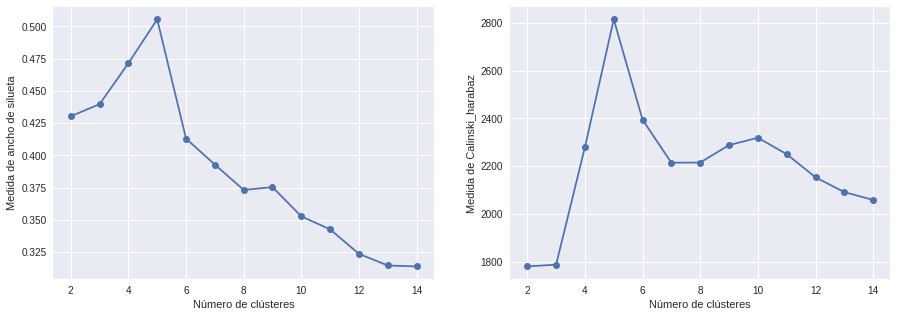

In [13]:
from sklearn.metrics import silhouette_score,calinski_harabaz_score

def medida_R_cuadrado(X, Xyp, cXs):
    cXglob = np.mean(X,axis=0) 
    labels = np.sort(np.unique(Xyp))
    sumTotal = np.sum(np.sum(X-cXglob,1)**2) 
    interior = np.sum([ np.sum(np.sum(X[Xyp==labels[k],:]-cXs[labels[k],:],1)**2) for k in np.arange(labels.size)])
    
    return (sumTotal-interior)/sumTotal

rsilueta = np.zeros(13)
calinski = np.zeros(13)
for k in np.arange(2,15):
    clustering = SpectralClustering(n_clusters=k, eigen_solver='arpack',affinity="nearest_neighbors").fit(D2x)
    D2yp_sk = clustering.labels_
    rsilueta[k-2] = silhouette_score(D2x, D2yp_sk)
    calinski[k-2] = calinski_harabaz_score(D2x, D2yp_sk)
    
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot( np.arange(2,15),rsilueta, linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de ancho de silueta")

ax[1].plot( np.arange(2,15),calinski, linestyle='-', marker='o')
ax[1].set_xlabel("Número de clústeres")
ax[1].set_ylabel("Medida de Calinski_harabaz")

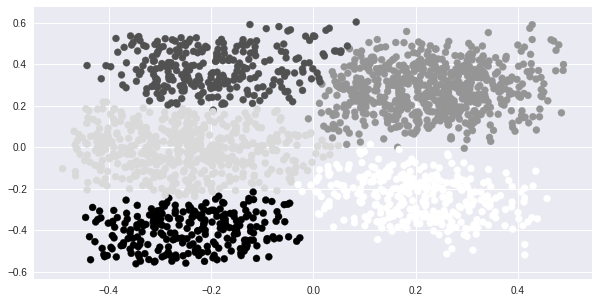

In [14]:
#Creamos el Modelo KMeans
clustering = SpectralClustering(n_clusters=5, eigen_solver='arpack',affinity="nearest_neighbors").fit(D2x)
D2yp_sk = clustering.labels_

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D2x[:,0],D2x[:,1], c=D2yp_sk)

## Conclusiones
Puesto que no conocemos el dataset no podemos decir que es el agrupamiento correcto sin embargo parece un comportamiento bastante adequado ya que separa las aglomeraciones mas densas.